# Supervised Learning : K- Nearest Neighbor (KNN)

## Imports

In [44]:
# Data manipulation imports
import numpy as np
import pandas as pd

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Modeling imports
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report


## Generating Synthetic Data for a Binary Classification Problem

In [45]:
np.random.seed(0)

df = pd.DataFrame({'X1': np.random.randint(1, 10, size=50),
                   'X2': np.random.randint(3, 10, size=50),
                   'Y': np.random.choice(['Bad', 'Good'], size=50)})
df

,X1,X2,Y
0,6,3,Bad
1,1,7,Bad
2,4,4,Good
3,4,7,Bad
4,8,4,Bad
5,4,5,Bad
6,6,5,Bad
7,3,3,Good
8,5,4,Good
9,8,4,Bad


In [ ]:
np.random.seed(0)

good_data = np.random.randint(low=3, high=7, size=(25, 2)) * np.random.normal(loc=1, scale=0.5, size=(25, 2))
bad_data = np.random.randint(low=0, high=3, size=(25, 2)) * np.random.normal(loc=1, scale=0.5, size=(25, 2))

df = pd.DataFrame({'X1': np.concatenate([good_data[:, 0], bad_data[:, 0]]),
                   'X2': np.concatenate([good_data[:, 1], bad_data[:, 1]]),
                   'Y': np.concatenate([['Good'] * 25, ['Bad'] * 25])})

df

In [46]:
df = df.sample(frac=1).reset_index(drop=True)

In [47]:
df.head()

,X1,X2,Y
0,5,8,Bad
1,4,9,Bad
2,3,7,Bad
3,7,4,Bad
4,1,7,Bad


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      50 non-null     int64 
 1   X2      50 non-null     int64 
 2   Y       50 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [49]:
df.describe()

,X1,X2
count,50.000000,50.00000
mean,4.900000,5.94000
std,2.612763,1.88885
min,1.000000,3.00000
25%,3.000000,4.00000
50%,4.500000,6.00000
75%,7.000000,7.00000
max,9.000000,9.00000


In [50]:
# plt.scatter(df['X1'], df['X2'], c=df['Y'].apply())

##  Visualizing the Data

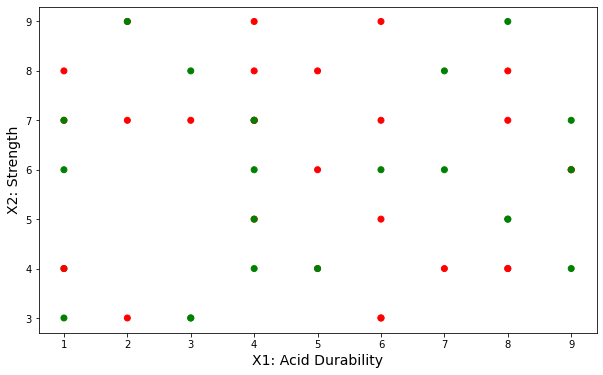

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(df['X1'], df['X2'], c=df['Y'].apply(lambda x: 'red' if x == 'Bad' else 'green'), marker='o')
plt.xlabel('X1: Acid Durability',fontsize=14)
plt.ylabel('X2: Strength',fontsize=14)
plt.show()


This plot provides a visual representation of the distribution of the data, which can be useful for understanding the underlying patterns and relationships in the data.

The color of each point is based on the value of 'Y' column

* If the value of 'Y' is 'Bad', the color is set to red
* If the value of 'Y' is 'Good', the color is set to green

## Splitting the Data into Training and Testing Sets

This code is splitting the data into two sets: a training set and a testing set. The features, stored in the dataframe "X", are separated from the labels, stored in the series "y". The train_test_split function from the sklearn library is used to split the data into a training set (80% of the data) and a testing set (20% of the data). The test_size parameter is set to 0.2, indicating that 20% of the data should be set aside for testing. The random_state parameter is set to 0, ensuring that the same data split is used each time the code is run. 

In [52]:
# Split the data into training and testing sets
X = df[['X1', 'X2']]
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_test)
print(y_test)

    X1  X2
28   1   8
11   4   5
10   8   4
41   2   9
2    3   7
27   8   5
38   7   8
31   4   6
22   5   4
4    1   7
28     Bad
11     Bad
10     Bad
41    Good
2      Bad
27    Good
38    Good
31    Good
22     Bad
4      Bad
Name: Y, dtype: object


In [ ]:
X = df[['X1', 'X2']]
y = df['Y']
print(X)
print(y)

In [53]:
df[['X1', 'X2']]

,X1,X2
0,5,8
1,4,9
2,3,7
3,7,4
4,1,7
5,9,7
6,3,3
7,8,9
8,6,5
9,6,3


In [ ]:
print(X_train.info())


In [ ]:
print(X_test.info())


In [ ]:
print(y_train.describe())

In [ ]:
print(y_test.describe())

## Building the model and fitting on training sets

* Create an instance of the KNeighborsClassifier class with the number of neighbors (n_neighbors) to consider for the classification problem set to 1. 
* KNN model is implemented with the KNeighborsClassifier imported from sklearn.neighbors and we fit the X_train, y_train data into it and make predictions on X_test data we will get the predictions in the numpy array.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Train the model using the fit method
knn.fit(X_train, y_train)

In [ ]:
y_pred= knn.predict(X_test)
y_pred

## Evaluating Model Performance with Accuracy Score

The accuracy score is calculated by comparing the true labels of the test set (y_test) with the predicted labels generated by the model (y_pred). The accuracy score is a commonly used metric for evaluating classification models, as it measures the proportion of correctly classified samples in the test set. 

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

## Predicting Labels for New Data with KNN
This demonstrates how a trained KNN model can be used to make predictions for new, unseen data.

In [ ]:
new_data = pd.DataFrame({'X1': [6,1,3], 'X2': [5,2,3]})

new_label = knn.predict(new_data)
print("Predicted Label for New Data:", new_label)

In [ ]:
# print(confusion_matrix(y_test,y_pred))

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [65]:
path ="fruit_data_with_colors _1_.csv"
data = pd.read_csv(path)
data.head(5)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
3,2,mandarin,mandarin,86.0,6.2,4.7,0.80
4,2,mandarin,mandarin,84.0,6.0,4.6,0.79


In [66]:
del data["fruit_name"]
del data["fruit_subtype"]
data.head()

,fruit_label,mass,width,height,color_score
0,1,192.0,8.4,7.3,0.55
1,1,180.0,8.0,6.8,0.59
2,1,176.0,7.4,7.2,0.60
3,2,86.0,6.2,4.7,0.80
4,2,84.0,6.0,4.6,0.79


In [67]:
data.head(62)

,fruit_label,mass,width,height,color_score
0,1,192.0,8.4,7.3,0.55
1,1,180.0,8.0,6.8,0.59
2,1,176.0,7.4,7.2,0.60
3,2,86.0,6.2,4.7,0.80
4,2,84.0,6.0,4.6,0.79
5,2,80.0,5.8,4.3,0.77
6,2,80.0,5.9,4.3,0.81
7,2,76.0,5.8,4.0,0.81
8,1,178.0,7.1,7.8,0.92
9,1,172.0,7.4,7.0,0.89


In [68]:
mean = np.mean(data['mass'])

In [69]:
mean

762.0392156862745

In [70]:
data["mass"].replace(np.nan, mean, inplace = True)
# data["Price"] = pd.to_numeric(data["Price"])
data["mass"]

0       192.000000
1       180.000000
2       176.000000
3        86.000000
4        84.000000
5        80.000000
6        80.000000
7        76.000000
8       178.000000
9       172.000000
10      166.000000
11      172.000000
12      154.000000
13      164.000000
14      152.000000
15      156.000000
16     1000.000000
17      762.039216
18      762.039216
19      762.039216
20      762.039216
21      762.039216
22      762.039216
23      762.039216
24      762.039216
25      762.039216
26      356.000000
27      362.000000
28      204.000000
29      140.000000
30      160.000000
31      158.000000
32      210.000000
33      164.000000
34      190.000000
35      142.000000
36      150.000000
37      160.000000
38      154.000000
39      158.000000
40      154.000000
41    30000.000000
42      180.000000
43      154.000000
44      194.000000
45      200.000000
46      186.000000
47      216.000000
48      196.000000
49      174.000000
50      132.000000
51      130.000000
52      116.

In [71]:
data

,fruit_label,mass,width,height,color_score
0,1,192.000000,8.4,7.3,0.55
1,1,180.000000,8.0,6.8,0.59
2,1,176.000000,7.4,7.2,0.60
3,2,86.000000,6.2,4.7,0.80
4,2,84.000000,6.0,4.6,0.79
5,2,80.000000,5.8,4.3,0.77
6,2,80.000000,5.9,4.3,0.81
7,2,76.000000,5.8,4.0,0.81
8,1,178.000000,7.1,7.8,0.92
9,1,172.000000,7.4,7.0,0.89


In [72]:
mean = np.mean(data['height'])
mean

7.711764705882352

In [73]:
data["height"].replace(np.nan, mean ,inplace=True)
data

,fruit_label,mass,width,height,color_score
0,1,192.000000,8.4,7.300000,0.55
1,1,180.000000,8.0,6.800000,0.59
2,1,176.000000,7.4,7.200000,0.60
3,2,86.000000,6.2,4.700000,0.80
4,2,84.000000,6.0,4.600000,0.79
5,2,80.000000,5.8,4.300000,0.77
6,2,80.000000,5.9,4.300000,0.81
7,2,76.000000,5.8,4.000000,0.81
8,1,178.000000,7.1,7.800000,0.92
9,1,172.000000,7.4,7.000000,0.89


data

In [89]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

NameError: name 'x' is not defined

In [90]:
print(test_data)

    fruit_label        mass  width    height  color_score
26            3  356.000000    9.2  9.200000         0.75
35            3  142.000000    7.6  7.800000         0.75
59            4  118.000000    6.1  8.100000         0.70
28            3  204.000000    7.5  9.200000         0.77
11            1  172.000000    7.1  7.600000         0.92
2             1  176.000000    7.4  7.200000         0.60
34            3  190.000000    7.5  8.100000         0.74
58            4  152.000000    6.5  8.500000         0.72
40            3  154.000000    7.3  7.500000         0.76
22            4  762.039216    7.3  7.711765         0.72
4             2   84.000000    6.0  4.600000         0.79
10            1  166.000000    6.9  7.300000         0.93


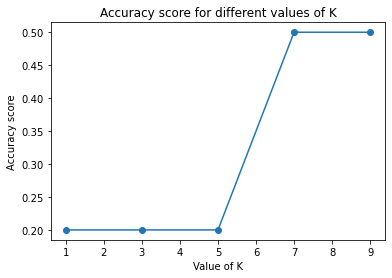

In [88]:
n_neighbors_list = [1, 3, 5, 7, 9]

# Initialize an empty list to store the accuracy scores 
accuracy_scores = []

# Iterate over the values and fit the KNN model for each value
for n_neighbors in n_neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

# Plot the accuracy scores
plt.plot(n_neighbors_list, accuracy_scores, '-o')
plt.xlabel('Value of K')
plt.ylabel('Accuracy score')
plt.title('Accuracy score for different values of K')
plt.show()

In [ ]:
def get_neighbors(train, test_row, num_neighbors):
    distances = []
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda x: x[1])
    neighbors = []
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

def k_nearest_neighbors(train, test, num_neighbors):
    predictions = []
    for row in test:
        output = predict_classification(train, row, num_neighbors)
        predictions.append(output)
    return predictions